# Load module

In [1]:
import sys
sys.path.append('../')

from ssd_data import datasets
from ssd_data import transforms, target_transforms, augmentations, utils

from ssd.models.ssd300 import SSD300
from ssd.train import *

#from torchvision import transforms > not import!!
from torch.utils.data import DataLoader
from torch.optim.sgd import SGD
from torch.optim.adam import Adam

# Load Dataset

In [2]:
augmentation = augmentations.AugmentationOriginal()

transform = transforms.Compose(
    [transforms.Resize((300, 300)),
     transforms.ToTensor(),
     transforms.Normalize(rgb_means=(0.485, 0.456, 0.406), rgb_stds=(0.229, 0.224, 0.225))]
)
target_transform = target_transforms.Compose(
    [target_transforms.ToCentroids(),
     target_transforms.OneHot(class_nums=datasets.VOC_class_nums, add_background=True),
     target_transforms.ToTensor()]
)
train_dataset = datasets.VOC2007_TrainValDataset(ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

train_loader = DataLoader(train_dataset,
                          batch_size=32,
                          shuffle=True,
                          collate_fn=utils.batch_ind_fn,
                          num_workers=4,
                          pin_memory=True)
print('{} training images'.format(len(train_dataset)))

5011 training images


# Define model

In [3]:
model = SSD300(class_labels=train_dataset.class_labels, batch_norm=False).cuda()
model.load_vgg_weights()
print(model)

SSD300(
  (codec): Codec(
    (encoder): Encoder()
    (decoder): Decoder()
  )
  (defaultBox): DBoxSSDOriginal()
  (predictor): Predictor()
  (inferenceBox): InferenceBox()
  (feature_layers): ModuleDict(
    (convRL1_1): ConvRelu(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): ReLU(inplace=True)
    )
    (convRL1_2): ConvRelu(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): ReLU(inplace=True)
    )
    (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (convRL2_1): ConvRelu(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): ReLU(inplace=True)
    )
    (convRL2_2): ConvRelu(
      (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): ReLU(inplace=True)
    )
    (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (convRL3

# Set matplotlib for Jupyter notebook

In [4]:
%matplotlib notebook

# Run training

<IPython.core.display.Javascript object>


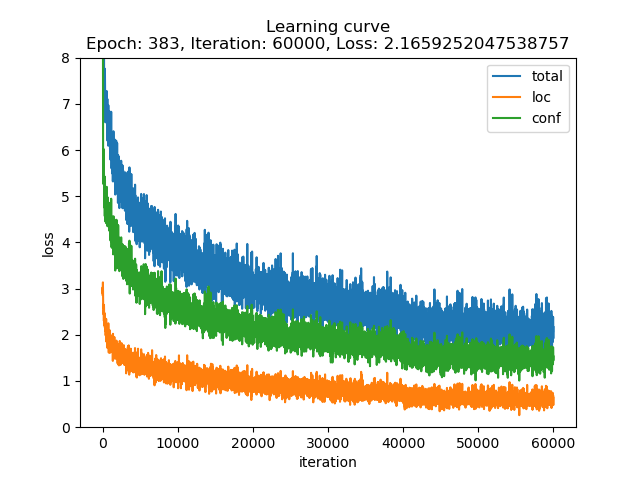

Training... Epoch: 32, Iter: 5000,	 [4256/5011	 (85%)]	Loss: 4.123886, Loc Loss: 1.240893, Conf Loss: 2.882993	Iter time: 0.18051
Saved model to /home/kado/Desktop/program/machile-learning/pytorch_SSD/weights/checkpoints/ssd300-voc2007_i-0005000_checkpoints20200607.pth

Training... Epoch: 64, Iter: 10000,	 [3488/5011	 (69%)]	Loss: 3.936227, Loc Loss: 1.223388, Conf Loss: 2.712839	Iter time: 0.1784
Saved model to /home/kado/Desktop/program/machile-learning/pytorch_SSD/weights/checkpoints/ssd300-voc2007_i-0010000_checkpoints20200607.pth

Training... Epoch: 96, Iter: 15000,	 [2720/5011	 (54%)]	Loss: 3.524736, Loc Loss: 1.062135, Conf Loss: 2.462601	Iter time: 0.17457
Saved model to /home/kado/Desktop/program/machile-learning/pytorch_SSD/weights/checkpoints/ssd300-voc2007_i-0015000_checkpoints20200607.pth

Training... Epoch: 128, Iter: 20000,	 [1952/5011	 (39%)]	Loss: 3.166835, Loc Loss: 0.958517, Conf Loss: 2.208318	Iter time: 0.17855
Saved model to /home/kado/Desktop/program/machile-lear

<IPython.core.display.Javascript object>


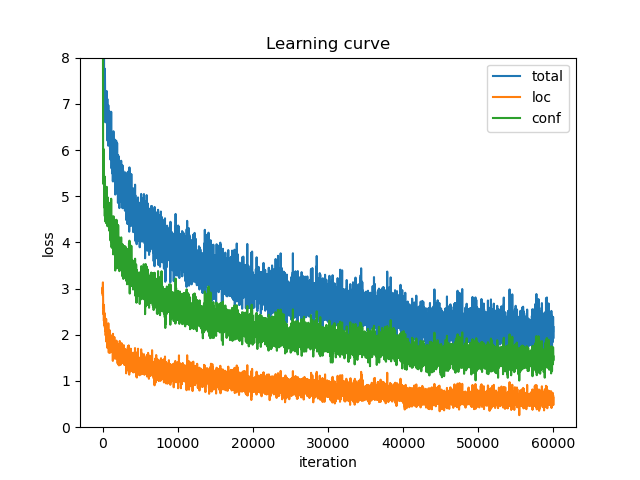

Saved graph to /home/kado/Desktop/program/machile-learning/pytorch_SSD/weights/results/ssd300-voc2007_learning-curve_i-60000.png


In [5]:
optimizer = SGD(model.parameters(), lr=1e-3, momentum=0.9, weight_decay=5e-4) # slower
#optimizer = Adam(model.parameters(), lr=1e-3, weight_decay=5e-4) # faster
iter_sheduler = SSDIterMultiStepLR(optimizer, milestones=(40000, 50000), gamma=0.1, verbose=True)

#save_manager = SaveManager(modelname='ssd300-voc2007++', interval=10, max_checkpoints=15, plot_yrange=(0, 8))#5000
save_manager = SaveManager(modelname='ssd300-voc2007', interval=5000, max_checkpoints=15, plot_yrange=(0, 8))
log_manager = LogManager(interval=10, save_manager=save_manager, loss_interval=10, live_graph=LiveGraph((0, 8)))
trainer = TrainLogger(model, loss_func=SSDLoss(), optimizer=optimizer, scheduler=iter_sheduler, log_manager=log_manager)

#trainer.train(70, train_loader)
trainer.train(60000, train_loader)

In [1]:
import sys
sys.path.append('../')

from ssd_data import datasets
from ssd_data import transforms, target_transforms, augmentations, utils

from ssd.models.ssd300 import SSD300
from ssd.train import *

#from torchvision import transforms > not import!!
from torch.utils.data import DataLoader

transform = transforms.Compose(
    [transforms.Resize((300, 300)),
     transforms.ToTensor(),
     transforms.Normalize(rgb_means=(0.485, 0.456, 0.406), rgb_stds=(0.229, 0.224, 0.225))]
)
target_transform = target_transforms.Compose(
    [target_transforms.ToCentroids(),
     target_transforms.OneHot(class_nums=datasets.VOC_class_nums, add_background=True),
     target_transforms.ToTensor()]
)


test_dataset = datasets.VOC2007_TestDataset(transform=transform, target_transform=target_transform)
test_loader = DataLoader(test_dataset,
                          batch_size=32,
                          shuffle=True,
                          collate_fn=utils.batch_ind_fn,
                          num_workers=4,
                          pin_memory=True)

model = SSD300(class_labels=test_dataset.class_labels, batch_norm=False).cuda()
model.load_weights('../weights/ssd300-voc2007/ssd300-voc2007_i-60000.pth')
model.eval()

evaluator = VOC2007Evaluator(test_loader)
ap = evaluator(model)
print(ap)


inferring...	155/155:	100%
{'aeroplane': 0.826271752454894, 'bicycle': 0.8537406525783257, 'bird': 0.740692329418554, 'boat': 0.6605554285104098, 'bottle': 0.4659900947876841, 'bus': 0.8486809435539098, 'car': 0.8217117456374082, 'cat': 0.8633262697693038, 'chair': 0.5211387959208639, 'cow': 0.8105308315312918, 'diningtable': 0.6718280913807813, 'dog': 0.8665779392424109, 'horse': 0.9068117895416751, 'motorbike': 0.870692472879984, 'person': 0.7734470014084992, 'pottedplant': 0.5301859819207846, 'sheep': 0.7568922393285529, 'sofa': 0.8215117084333201, 'train': 0.8744779774908149, 'tvmonitor': 0.6599347718602133, 'mAP': 0.757249940882484}
